# Tensorflow quickview

In tensorflow every computation is defined as a Graph. Graphs are made of series of operations (known as ops in short). Graph has to be launched into a Session to execute operations. e.g. multiplying two numbers; 

In [42]:
import tensorflow as tf   # importing the tensorflow library
x = tf.constant([2]) 
y = tf.constant([3])   # x and y are known as source ops

c = tf.mul(x,y)  #operation to multiply two numbers
#up to this line is known as construction (assembly) phrase 

#following is known as execution phrase

sess = tf.Session() #creating a session 

product = sess.run(c) #loading graph into the session
print(product)
sess.close()  #this has to be done to release resources:

#alternately we can do
with tf.Session() as sess:
    product = sess.run(c)
    print(product)

[6]
[6]


#### Variables
We can also pass variables x, y in the function mul(x,y)

In [44]:
x = tf.Variable(0, name='x') # variable with name x and initial value as 0
y = tf.Variable(0, name='y')

c = tf.add(x,y)  # Let us add instead 
d = x-y          # this is also valid
#variables should be initialized before being used in any computation graph
#init = tf.initialize_all_variables()
init=tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)
result = sess.run(c, feed_dict={x:5,y:6})  #input variable are fed to c as a dictionary
print('sum',result)
result2 = sess.run(d, feed_dict={x:5,y:6})
print('difference',result2)
result3 = sess.run(c)     #this will use the default parameters 
print('default', result3)
sess.close()

('sum', 11)
('difference', -1)
('default', 0)


### Tensors are multidimensional arrays
Scalar is zero dimension e.g. [2] <br>
Vector is one dimension e.g. [1,2,3]<br>
Matrix is two dimensional tensor eg. [[1,2,3],[4,5,6]]<br>
Tensor is higher dimensional (>2) 

In [45]:
#matmul is used to multiply two matrices. matmul(x,y) where x is m x n dimensional and y is n x k dimensional 
# and the product is m x k dimensional 

a = tf.constant([[1,2,3],[4,5,6]])  # 2 by 3 
b = tf.constant([[1,2],[3,4],[5,6]])# 3 by 2
c = tf.matmul(a,b)
with tf.Session() as sess:
    result = sess.run(c)
    print(result)  # will be 2 by 2

[[22 28]
 [49 64]]


#### Placeholders 
placeholders are basically an empty tensor (like holes) where any data (tensor) can be passed. They are created as <strong> tf.placeholder(datatype)</strong> <br>
e.g. x = tf.placeholder(tf.float32) 

In [46]:
x = tf.placeholder(tf.float32)
y = x*2  #multiply x by 2
with tf.Session() as sess:
    print('x as a scalar')
    print(sess.run(y, feed_dict={x:20}))   # x is a scalar
    print('x as a vector')
    print(sess.run(y, feed_dict={x:[2,3,5]})) # x is a vector
    print('x as a matrix')
    print(sess.run(y, feed_dict={x:[[1,2],[3,4]]})) # x is a matrix
    print('x as a tensor')
    print(sess.run(y, feed_dict={x:[[[1,2],[3,4]],[[5,6],[7,8]]]})) # x is a tensor

x as a scalar
40.0
x as a vector
[  4.   6.  10.]
x as a matrix
[[ 2.  4.]
 [ 6.  8.]]
x as a tensor
[[[  2.   4.]
  [  6.   8.]]

 [[ 10.  12.]
  [ 14.  16.]]]


Placeholder with a fixed dimension

In [47]:
z = tf.placeholder(tf.float32, [2,3])  # z has to be a 2 by 3 matrix
y = z*2 
with tf.Session() as sess:
    print(sess.run(y, feed_dict={z:[[1,2,3],[4,5,6]]}))
    # print(sess.run(y, feed_dict={z:[[1,2],[4,5]]})) will produce an error

[[  2.   4.   6.]
 [  8.  10.  12.]]


### Matrix Operations

In [1]:
import tensorflow as tf

a = tf.Variable([[1.,2.],[3.,4.]])   #2 by 2 matrix (tf.placeholder(datatype) can be used to feed any tensor)
b = tf.Variable([[3.,4.],[5.,6.]])
s = tf.add(a,b)  #adding two matrices
p = tf.matmul(a,b) #matrix multiplication
t = tf.transpose(a) #transpose
i = tf.matrix_inverse(a)   #inverse
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(a))
    print(sess.run(b))
    print(sess.run(s))
    print(sess.run(p))
    print(sess.run(t))
    print(sess.run(i))
    print(sess.run(a*b))
    

[[ 1.  2.]
 [ 3.  4.]]
[[ 3.  4.]
 [ 5.  6.]]
[[  4.   6.]
 [  8.  10.]]
[[ 13.  16.]
 [ 29.  36.]]
[[ 1.  3.]
 [ 2.  4.]]
[[-2.00000024  1.00000012]
 [ 1.50000012 -0.50000006]]
[[  3.   8.]
 [ 15.  24.]]


### ----------------------------------------------------------------------------------------------------------------------------------
# Linear Regression with Tensorflow 
A linear regression is relationship between a dependent variable Y and an independent variable X according to <br>
Y = w*X + b

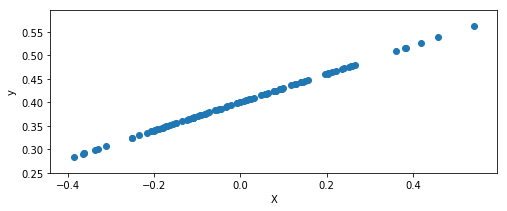

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
#x_data = np.linspace(0,1,100) #
x_data = np.random.normal(loc=0, scale=0.2, size=100)
y_data = 0.3*x_data + 0.4

plt.figure(figsize=(8,3))
plt.scatter(x_data, y_data)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

#print(np.mean(np.sum(y_data)))

### Using Gradient Descent
#### Cost function 
$ J = \frac{1}{2m} \sum_{i} (y'_{i} -y_{i})^{2} $ where y' = wx +b (fit) and y is true value <br>
##### Algoritm (minimize J)
Updates (with $\alpha$ as learning rate):<br>
$b : b - \alpha \frac{\partial J}{\partial b} =>  b - \alpha \frac{1}{m} \sum_{i} (y'_{i}-y_{i})$ <br>
$w : w - \alpha \frac{\partial J}{\partial w} =>  w - \alpha \frac{1}{m} \sum_{i} (y'_{i}-y_{i})x_{i}$

In [4]:
# organize a graph
W = tf.Variable(tf.zeros([1]))#random_uniform([1], -1.0, 1.0), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")
alpha = tf.constant(0.3, name='learning_rate')
init = tf.global_variables_initializer()


with tf.Session() as sess:
    parameters = [] # step, w, b, j
    sess.run(init)
    #print(sess.run(del_w))
    for steps in range(301):
        #print(sess.run([W,b]))
        
        y_ = W*x_data + b
        j = tf.reduce_mean(tf.square(y_-y_data))
        del_b = tf.reduce_mean(y_-y_data)
        del_w = tf.reduce_mean((y_-y_data)*x_data)
        W-= del_w*alpha
        b-= del_b*alpha


        #print(sess.run([W,b]))
        #y_ = W*x_data + b
        #print(sess.run(tf.reduce_sum(y_)))
        #sess.run([y_, W, b, j])
        #print(steps)
        if steps %5 ==0:
            #print(steps)
            parameters.append([steps, sess.run(W),sess.run(b),sess.run(j)])

#print(parameters)
    
#for p in parameters:
    #print(p[:-1])
print(parameters[-1])

[300, array([ 0.2808589], dtype=float32), array([ 0.39929751], dtype=float32), 1.1529047e-05]


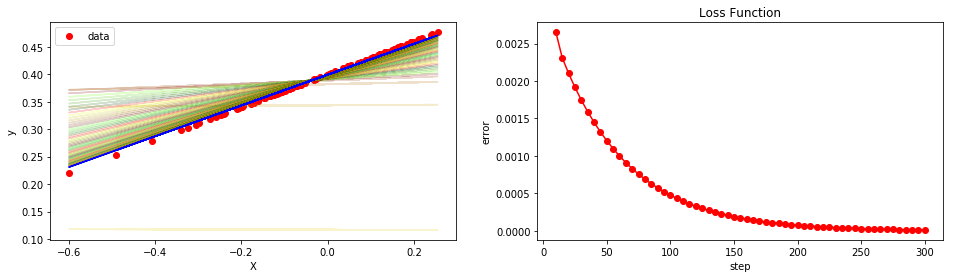

In [5]:
plt.subplots(1 ,2, figsize=(16,4))
plt.subplot(121)
plt.plot(x_data, y_data, 'ro', label='data')
r , g , b = (1.0, 1.0, 0.0)

j_step=[]
j_value=[]
for parameter in parameters:
    j_step.append(parameter[0])
    j_value.append(parameter[3])
    r-=0.1
    g-=0.2
    if r <0.0: r=1.0
    if g < 0.0: g=1.0
    
    plt.plot(x_data, parameter[1]*x_data+parameter[2], color=(r,g,b), alpha=0.2)
plt.plot(x_data, parameter[1]*x_data+parameter[2], color='b')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')

plt.subplot(122)
plt.plot(j_step[2:],j_value[2:],'ro-')
plt.xlabel('step')
plt.ylabel('error')
plt.title('Loss Function')

plt.show()

### Using Normal equation
Hypothesis : y = w*x + b <br>
Assume y = $\sum_{i}^{0,1} w_{i} x_{i}$ where $x_{0} =1, w_{0}=b$ <br>

Normal equation: <br>
$w = [x^{T}x]^{-1} x^{T}y$

In [15]:
x = tf.placeholder(tf.float32, [2,None])
y = tf.placeholder(tf.float32)

x0 = np.ones(len(x_data))
xtx = tf.matmul(x,tf.transpose(x))
xty = tf.matmul(y,tf.transpose(x))
w = tf.matmul(tf.matrix_inverse(xtx),tf.transpose(xty))

with tf.Session() as sess:
    sess.run(init)
    result=sess.run(w, feed_dict={x:[x0, x_data], y:[y_data]})
    print(result) 
    #print(sess.run(x0)) #, feed_dict={x:[[1,2],[3,4]]}))

[[ 0.39999995]
 [ 0.29999998]]


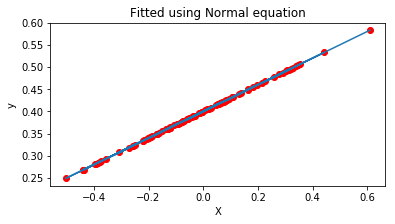

In [16]:
plt.figure(figsize=(6,3))
y_ = result[0]+result[1]*x_data
plt.plot(x_data,y_data,'ro')
plt.plot(x_data,y_)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Fitted using Normal equation')
plt.show()

## Using Optimizer from tensorflow

In [104]:
#Linear regression
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
W = tf.Variable(0.0, name="weight")
b = tf.Variable(0.0, name="bias")
y_ = W*X + b
init=tf.global_variables_initializer()
residual = tf.reduce_mean(tf.square(y_-y))
optimizer = tf.train.GradientDescentOptimizer(0.3)
train = optimizer.minimize(residual)

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(W), sess.run(b))
    #print(sess.run(residual, feed_dict={X:x_data, y:y_data}))
    #sess.run(y, feed_dict={X:2})
    for step in range(400):
        sess.run(train, feed_dict={X:x_data, y:y_data})
        if step % 50 ==0:
            print(step, sess.run(W), sess.run(b))
    W = sess.run(W)
    b = sess.run(b)

(0.0, 0.0)
(0, 0.00064885151, 0.23326638)
(50, 0.22625302, 0.39619541)
(100, 0.2818521, 0.3981387)
(150, 0.29523325, 0.39860642)
(200, 0.29845369, 0.39871898)
(250, 0.29922882, 0.39874607)
(300, 0.29941523, 0.39875257)
(350, 0.29946014, 0.39875415)


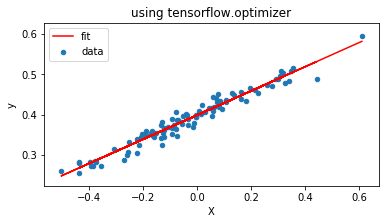

In [105]:
y_fit = x_data*W + b
plt.figure(figsize=(6,3))
plt.scatter(x_data,y_data, label='data', s=20)
plt.plot(x_data,y_fit, label='fit', c='r')
plt.xlabel('X')
plt.ylabel('y')
plt.title('using tensorflow.optimizer')
plt.legend()
plt.show()

# put some noise on y


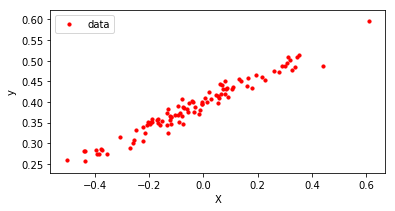

In [27]:
y_data+=np.random.normal(loc=0.0, scale=0.01, size=len(y_data))
plt.figure(figsize=(6,3))
plt.scatter(x_data,y_data, label='data', s=10, c='r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Least square fit with Normal Equation

In [32]:
x = tf.placeholder(tf.float32, [2,None])
y = tf.placeholder(tf.float32)
#x = tf.constant([[x_data/x_data],[x_data]])
xtx = tf.matmul(x,tf.transpose(x))
xty = tf.matmul(y,tf.transpose(x))
w = tf.matmul(tf.matrix_inverse(xtx),tf.transpose(xty))
with tf.Session() as sess:
    result=sess.run(w, feed_dict={x:[x0, x_data], y:[y_data]})
    print(result) 
    #print(sess.run(x0)) #, feed_dict={x:[[1,2],[3,4=Z]]}))

[[ 0.39875469]
 [ 0.29947445]]


In [33]:
y_fit = result[0]+result[1]*x_data

### Tensorflow

In [29]:
W = tf.Variable(0.0)
b = tf.Variable(0.0)
y = W*x_data +b

residual = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.3)
train = optimizer.minimize(residual)

with tf.Session() as sess:
    weight_bias = [[0.0,0.0]]
    sess.run(tf.global_variables_initializer())
    print(sess.run(W), sess.run(b))
    for step in range(400):
        sess.run(train) 
        if step % 50 ==0:
            parameters = sess.run([W,b])
            print(step, parameters)
            weight_bias.append(parameters)
    


(0.0, 0.0)
(0, [0.00064885151, 0.23326638])
(50, [0.22625302, 0.39619541])
(100, [0.2818521, 0.3981387])
(150, [0.29523325, 0.39860642])
(200, [0.29845369, 0.39871898])
(250, [0.29922882, 0.39874607])
(300, [0.29941523, 0.39875257])
(350, [0.29946014, 0.39875415])


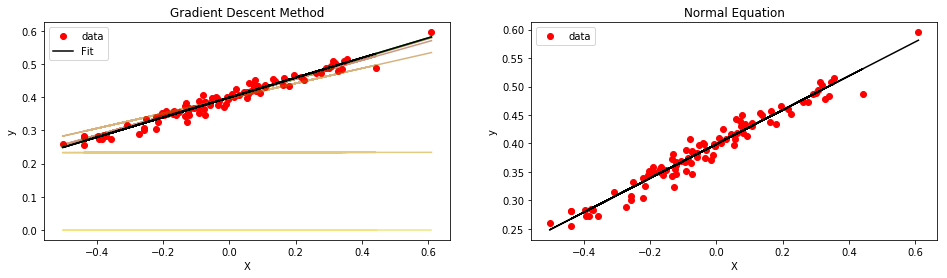

In [38]:
#plot
plt.subplots(1,2, figsize=(16,4))
plt.subplot(121)
plt.plot(x_data, y_data, 'ro', label='data')
r , g , b = (1.0, 1.0, 0.0)

for parameters in weight_bias:
    r-=0.1
    g-=0.2
    if r <0.0: r=1.0
    if g < 0.0: g=1.0
    plt.plot(x_data, parameters[0]*x_data+parameters[1], color=(r,g,b), alpha=0.5)
plt.plot(x_data, parameters[0]*x_data+parameters[1], color='k', label='Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Descent Method')
plt.legend()

plt.subplot(122)
plt.plot(x_data, y_data, 'ro', label='data')
plt.plot(x_data, y_fit, c='k')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Normal Equation')
plt.legend()
plt.show()

# Logistic Regression (Classification)
Linear regression assumes that the response variable (dependent variable) is continuous and normally distributed. When the response variable is binomially distributed (like a case of classification) we use logistic regression which is just a variation of the linear regression with binomial (two classes) or multinomial distribution of response variable. <br>
Hypothesis used in Logistic Regression is :<br>
$y = f(z)$  with $z=w*x+b$ where $f$ is known as activation function. Some most common activation functions are step function, sigmoid function, tanh, Relu ....<br>
Step (Hard limit) function:<br>
\begin{align}
f=
\begin{cases}
    0 & z \lt 0\\
    1 & z \geq 0\\
\end{cases}
\end{align}

Sigmoid:<br>

\begin{align}
f = \frac{1}{1+e^{-z}}
\end{align}

Tanh:<br>
\begin{align}
    f = tanh(z) = \frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}
\end{align}

Relu:<br>
\begin{align}
f=
\begin{cases}
    0 & z \lt 0\\
    z & z \geq 0\\
\end{cases}
\end{align}


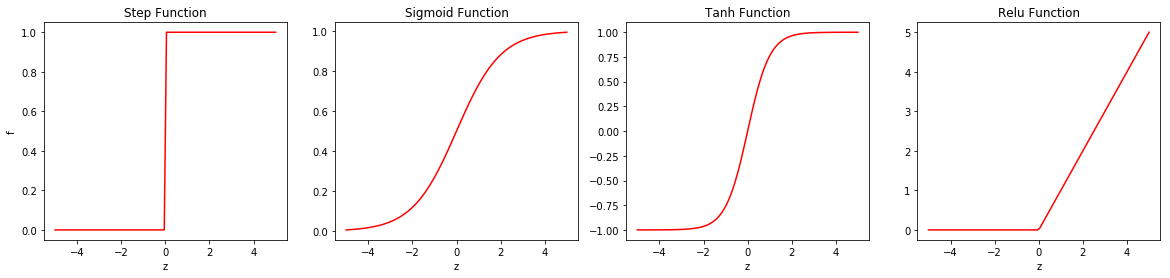

In [101]:
#Plots of activation functions
plt.subplots(1,4,figsize=(20,4))
x = np.linspace(-5,5,100)
#Step
z = (x>=0).astype(int)

plt.subplot(141)
plt.plot(x,z, 'r-')
plt.title('Step Function')
plt.xlabel('z')
plt.ylabel('f')

#sigmoid
ex_m = np.exp(-x)

z = 1/(1+ex_m)
plt.subplot(142)
plt.plot(x,z, 'r-')
plt.title('Sigmoid Function')
plt.xlabel('z')


#tanh
ex_p = np.exp(x)
z = (ex_p-ex_m)/(ex_p+ex_m)
plt.subplot(143)
plt.plot(x,z, 'r-')
plt.title('Tanh Function')
plt.xlabel('z')


#Relu
z = (x >=0).astype(float)*x
plt.subplot(144)
plt.plot(x,z, 'r-')
plt.title('Relu Function')
plt.xlabel('z')



plt.show()

#### Using tensorflow
No hardlimit or step function in tensorflow


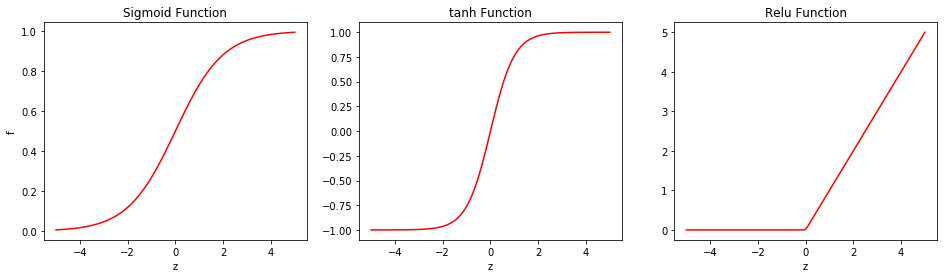

In [102]:
#sigmoid
#x = tf.Variable(tf.random_uniform([100], -5.0, 5.0))
x = np.linspace(-5.0, 5.0, 100)
z_sig = tf.nn.sigmoid(x)
z_tan = tf.nn.tanh(x)
z_relu = tf.nn.relu(x)
#print(x)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    z_s = sess.run(z_sig) #, feed_dict={:x})
    z_t = sess.run(z_tan)
    z_r = sess.run(z_relu)

plt.subplots(1,3, figsize=(16,4))
plt.subplot(131)
plt.plot(x,z_s, 'r-')
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('f')

plt.subplot(132)
plt.plot(x,z_t, 'r-')
plt.title('tanh Function')
plt.xlabel('z')


plt.subplot(133)
plt.plot(x,z_r, 'r-')
plt.title('Relu Function')
plt.xlabel('z')


plt.show()

### Algorithm for Logistic Regression
Cost funtion can be defined as : <br>
$J = - \frac{1}{m} \sum [y log(f) + (1-y)log(1-f) ] $ where $ f(z) $ is an activation function and $ z = \sum w_{j}x_{j} +b$ <br>
Weights are updated as: <br>
$ w_{j} : w_{j} - \alpha \frac{\partial J}{\partial w_{j}} =>  w_{j} - \alpha \sum (f - y)x_{j}$ <br>
$ b : b - \alpha \frac{\partial J}{\partial b} =>  b - \alpha \sum (f - y)$ <br>

Let us use the activation function as :
$f = sigmoid(z) $

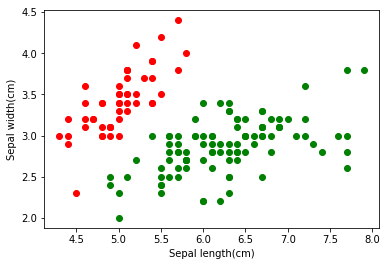

In [3]:
#get a data 
#Iris data
%matplotlib inline
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import tensorflow as tf

iris = load_iris()
features = iris.data
target = iris.target

# let us take only two features sepal length and sepal width
x_data = features[:,0:2]
#make binary classes (0 and 1) replacing 2 by one
for i in range(len(target)):
    if target[i]==2: target[i]=1

color = ['r','g']
for i in range(len(target)):
    plt.plot(x_data[i,0], x_data[i,1], 'o', c=color[target[i]])
plt.xlabel('Sepal length(cm)')
plt.ylabel('Sepal width(cm)')


('steps :', 0, 'error: ', 0.807347)
('steps :', 50, 'error: ', 0.27020594)
('steps :', 100, 'error: ', 0.17072891)
('steps :', 150, 'error: ', 0.13486019)
('steps :', 200, 'error: ', 0.11425272)
('steps :', 250, 'error: ', 0.10075444)
('steps :', 300, 'error: ', 0.091164775)
('steps :', 350, 'error: ', 0.083965324)
('steps :', 400, 'error: ', 0.07834018)
('steps :', 450, 'error: ', 0.073810287)


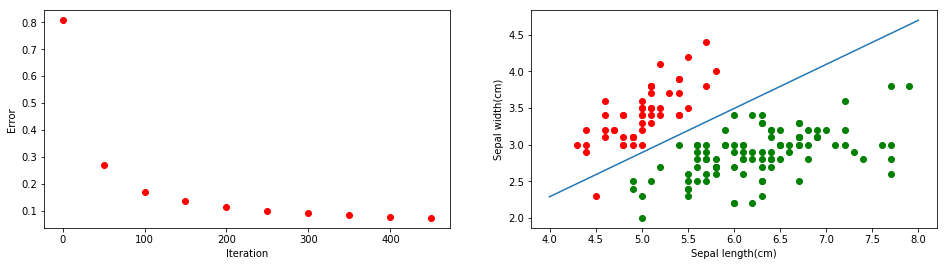

In [5]:
#algorithm
y_data=target.reshape((len(target),1))
X = tf.placeholder(tf.float32, [None, 2])  #2 features any number of observation
Y = tf.placeholder(tf.float32,[None,1]) #output label target
W = tf.Variable([[-0.2], [0.2]]) #can also be randomized
b = tf.Variable([0.4])
alpha = tf.constant(0.3)
j = 2. #some number 


init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    iteration = []
    error =[]
    for steps in range(500):
        
        activation = sess.run(tf.nn.sigmoid(tf.add(tf.matmul(X,W),b)), feed_dict={X:x_data, Y:y_data})
        del_b = sess.run(tf.reduce_mean(activation-y_data))
        b-=del_b*alpha
        del_w = sess.run(tf.reduce_mean(tf.mul((activation-y_data),x_data), axis=0))
        #print(del_w)
        W-=(del_w.reshape((2,1)))*alpha
        
        if j<0.01:
            print('Converged :')
            
            print('Total steps: ', steps)
            break
        if steps%50==0:
            j = -sess.run(tf.reduce_mean(y_data*tf.log(activation)+(1.0-y_data)*tf.log(1.-activation)))
            iteration.append(steps)
            error.append(j)
            print('steps :',steps, 'error: ', j)
            
    W = sess.run(W)
    b = sess.run(b)

plt.subplots(1,2,figsize=(16,4))
plt.subplot(121)
plt.plot(iteration,error,'ro')
plt.xlabel('Iteration')
plt.ylabel('Error')

plt.subplot(122)
color = ['r','g']
for i in range(len(target)):
    plt.plot(x_data[i,0], x_data[i,1], 'o', c=color[target[i]])
plt.xlabel('Sepal length(cm)')
plt.ylabel('Sepal width(cm)')
x_ = np.linspace(4,8,100)
y_ = (-b/W[1])+ (-W[0]/W[1])*x_
plt.plot(x_,y_)
plt.show()

### using gradient descent optimizer 

In [7]:
y_data=target.reshape((len(target),1))
X = tf.placeholder(tf.float32, [None, 2])  #2 features any number of observation
Y = tf.placeholder(tf.float32,[None,1]) #output label target
W = tf.Variable([[0.0],[0.0]]) #can also be randomized
b = tf.Variable([0.0])
#activation = tf.matmul(X,W)
activation = tf.nn.sigmoid(tf.add(tf.matmul(X,W),b))
cost = -tf.reduce_mean(y_data*tf.log(activation)+(1.0-y_data)*tf.log(1.-activation))

optimizer = tf.train.GradientDescentOptimizer(0.2)
#optimizer = tf.train.GradientDescentOptimizer(0.3)
train = optimizer.minimize(cost)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    iteration = []
    error =[]
    for steps in range(1000):
        t_, w_, b_ , c_ = sess.run([train, W, b, cost], feed_dict={X:x_data, Y:y_data})
        if c_< 0.01:
            print('Converged :')
            print('Total steps: ', steps)
            break
            
        if steps%50==0:
            iteration.append(steps)
            error.append(c_)
            print('steps, weights, bias, error',steps, w_, b_ , c_)
    W = sess.run(W)
    b = sess.run(b)

('steps, weights, bias, error', 0, array([[ 0.25060007],
       [ 0.07753333]], dtype=float32), array([ 0.03333334], dtype=float32), 0.69314748)
('steps, weights, bias, error', 50, array([[ 0.94395024],
       [-1.44110703]], dtype=float32), array([-0.18290418], dtype=float32), 0.31806001)
('steps, weights, bias, error', 100, array([[ 1.4298799 ],
       [-2.27821541]], dtype=float32), array([-0.30753815], dtype=float32), 0.220034)
('steps, weights, bias, error', 150, array([[ 1.77089369],
       [-2.85723424]], dtype=float32), array([-0.40212569], dtype=float32), 0.17320402)
('steps, weights, bias, error', 200, array([[ 2.03420901],
       [-3.30039406]], dtype=float32), array([-0.48030558], dtype=float32), 0.14571109)
('steps, weights, bias, error', 250, array([[ 2.2493844 ],
       [-3.66014791]], dtype=float32), array([-0.54810905], dtype=float32), 0.1275277)
('steps, weights, bias, error', 300, array([[ 2.43181157],
       [-3.96348882]], dtype=float32), array([-0.60872877], dtype

#### Plot

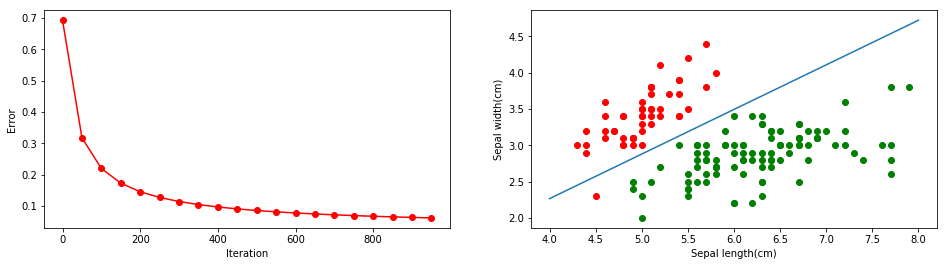

In [8]:
plt.subplots(1,2,figsize=(16,4))
plt.subplot(121)
plt.plot(iteration,error,'ro-')
plt.xlabel('Iteration')
plt.ylabel('Error')

plt.subplot(122)
color = ['r','g']
for i in range(len(target)):
    plt.plot(x_data[i,0], x_data[i,1], 'o', c=color[target[i]])
plt.xlabel('Sepal length(cm)')
plt.ylabel('Sepal width(cm)')
x_ = np.linspace(4,8,100)
y_ = (-b_/w_[1])+ (-w_[0]/w_[1])*x_
plt.plot(x_,y_)
plt.show()